# Dance Music Analysis: 120-160 BPM Range

Analyzing dance music hits in the combined 120-160 BPM range to capture both standard dance tempo and faster EDM tracks.

In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualizations
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = [12, 6]
sns.set_style('whitegrid')

In [8]:
# Load data
sheet_url = "https://docs.google.com/spreadsheets/d/1ae96nZRL_kJWb_EEv2avxMOgGClvyc77SpY-VBqVGiY/edit#gid=1052928543"
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df = pd.read_csv(csv_export_url)

# Create BPM ranges with combined dance range
bpm_ranges = pd.cut(df['tempo'], 
                    bins=[0, 80, 100, 120, 160, 200],
                    labels=['<80', '80-100', '100-120', '120-160', '>160'])
df['bpm_range'] = bpm_ranges

# Define hit threshold (top 25%)
hit_threshold = df['track_popularity'].quantile(0.75)
df['is_hit'] = df['track_popularity'] >= hit_threshold

# Function to get example hit songs
def get_hit_examples(data, n=5):
    hits = data[data['is_hit']].sort_values('track_popularity', ascending=False)
    examples = hits[['track_name', 'track_artist', 'track_popularity', 
                    'tempo', 'energy', 'danceability', 'playlist_subgenre']].head(n)
    return examples

# Analyze dance music hits (120-160 BPM)
dance_hits = df[
    (df['bpm_range'] == '120-160') &
    (df['playlist_subgenre'].str.contains('dance|edm', case=False, na=False))
]

print("Dance Music Hits (120-160 BPM):")
examples = get_hit_examples(dance_hits)
for _, song in examples.iterrows():
    print(f"\n{song['track_name']} by {song['track_artist']}")
    print(f"Genre: {song['playlist_subgenre']}")
    print(f"Popularity: {song['track_popularity']}")
    print(f"BPM: {song['tempo']:.0f}")
    print(f"Energy: {song['energy']:.2f}")
    print(f"Danceability: {song['danceability']:.2f}")
print("-" * 80)

Dance Music Hits (120-160 BPM):

everything i wanted by Billie Eilish
Genre: dance pop
Popularity: 97
BPM: 120
Energy: 0.23
Danceability: 0.70

Yummy by Justin Bieber
Genre: dance pop
Popularity: 95
BPM: 146
Energy: 0.52
Danceability: 0.66

bad guy by Billie Eilish
Genre: dance pop
Popularity: 95
BPM: 135
Energy: 0.42
Danceability: 0.70

Lose Control by MEDUZA
Genre: dance pop
Popularity: 91
BPM: 124
Energy: 0.53
Danceability: 0.60

Yellow Hearts by Ant Saunders
Genre: dance pop
Popularity: 89
BPM: 129
Energy: 0.44
Danceability: 0.86
--------------------------------------------------------------------------------


## BPM Distribution in Dance Hits

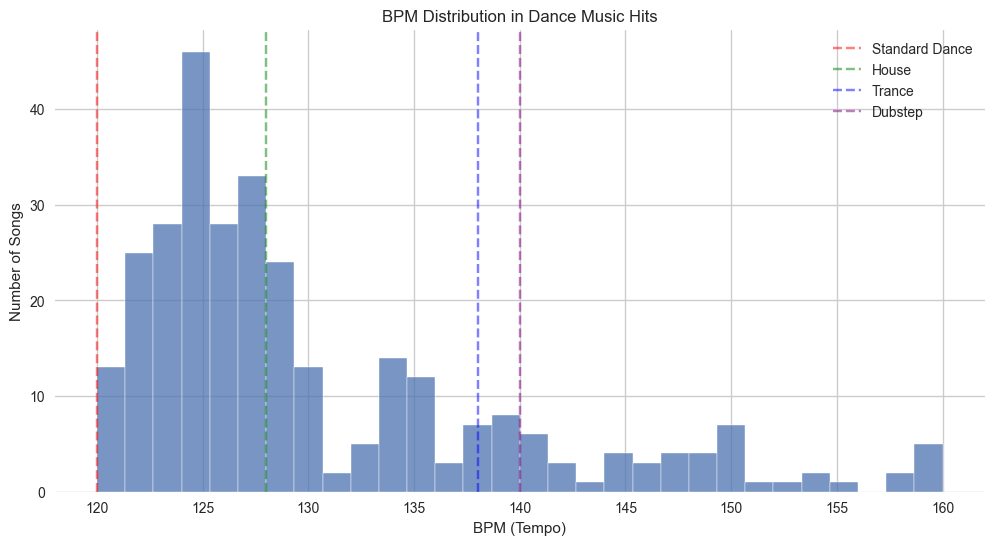


Dance Hit Statistics:
Average BPM: 130.4
Most Common BPM Range: 122
BPM Range: 120 - 160


In [9]:
# Plot BPM distribution for dance hits
plt.figure(figsize=(12, 6))
sns.histplot(data=dance_hits[dance_hits['is_hit']], x='tempo', bins=30)
plt.title('BPM Distribution in Dance Music Hits')
plt.xlabel('BPM (Tempo)')
plt.ylabel('Number of Songs')

# Add vertical lines for common dance BPMs
common_bpms = {
    'Standard Dance': 120,
    'House': 128,
    'Trance': 138,
    'Dubstep': 140
}

colors = ['r', 'g', 'b', 'purple']
for (label, bpm), color in zip(common_bpms.items(), colors):
    plt.axvline(x=bpm, color=color, linestyle='--', alpha=0.5, label=label)

plt.legend()
plt.show()

# Print statistics
print("\nDance Hit Statistics:")
print(f"Average BPM: {dance_hits[dance_hits['is_hit']]['tempo'].mean():.1f}")
print(f"Most Common BPM Range: {dance_hits[dance_hits['is_hit']]['tempo'].mode().iloc[0]:.0f}")
print(f"BPM Range: {dance_hits[dance_hits['is_hit']]['tempo'].min():.0f} - {dance_hits[dance_hits['is_hit']]['tempo'].max():.0f}")

## Energy and Danceability in Dance Hits

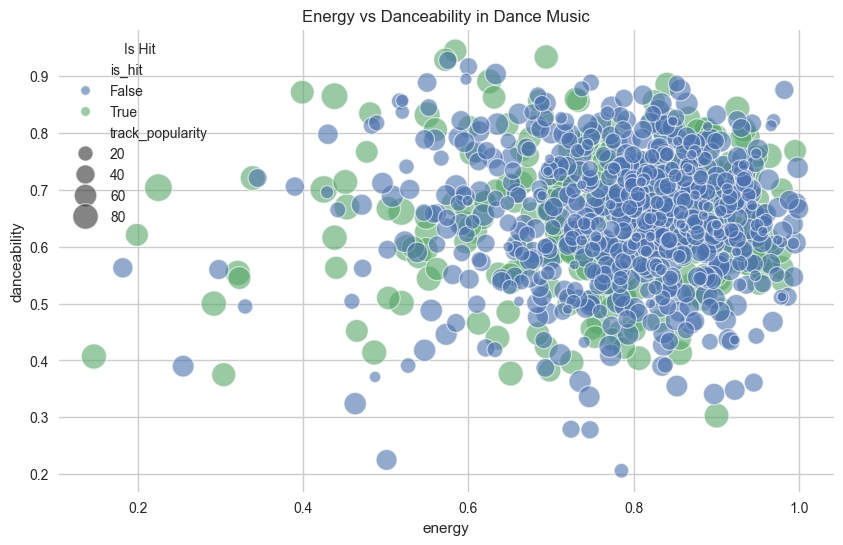


Typical Metrics for Dance Hits:
Energy: 0.76 ± 0.15
Danceability: 0.65 ± 0.12

Example Hits with High Energy and Danceability:

Turn Me On (feat. Vula) by Riton
BPM: 124
Energy: 0.83
Danceability: 0.74
Popularity: 86

One Kiss (with Dua Lipa) by Calvin Harris
BPM: 124
Energy: 0.86
Danceability: 0.79
Popularity: 85

Promises (with Sam Smith) by Calvin Harris
BPM: 123
Energy: 0.77
Danceability: 0.78
Popularity: 84

In My Mind by Dynoro
BPM: 126
Energy: 0.77
Danceability: 0.69
Popularity: 84

A Gente Fez Amor - Ao Vivo by Gusttavo Lima
BPM: 134
Energy: 0.94
Danceability: 0.79
Popularity: 84


In [10]:
# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dance_hits, 
                x='energy', y='danceability',
                hue='is_hit', size='track_popularity',
                sizes=(50, 400), alpha=0.6)
plt.title('Energy vs Danceability in Dance Music')
plt.legend(title='Is Hit')
plt.show()

# Print average metrics for hits
hit_metrics = dance_hits[dance_hits['is_hit']].agg({
    'energy': ['mean', 'std'],
    'danceability': ['mean', 'std']
}).round(2)

print("\nTypical Metrics for Dance Hits:")
print(f"Energy: {hit_metrics['energy']['mean']:.2f} ± {hit_metrics['energy']['std']:.2f}")
print(f"Danceability: {hit_metrics['danceability']['mean']:.2f} ± {hit_metrics['danceability']['std']:.2f}")

# Show example hits with high energy and danceability
print("\nExample Hits with High Energy and Danceability:")
top_dance_hits = dance_hits[
    (dance_hits['is_hit']) &
    (dance_hits['energy'] > hit_metrics['energy']['mean']) &
    (dance_hits['danceability'] > hit_metrics['danceability']['mean'])
].sort_values('track_popularity', ascending=False).head(5)

for _, song in top_dance_hits.iterrows():
    print(f"\n{song['track_name']} by {song['track_artist']}")
    print(f"BPM: {song['tempo']:.0f}")
    print(f"Energy: {song['energy']:.2f}")
    print(f"Danceability: {song['danceability']:.2f}")
    print(f"Popularity: {song['track_popularity']}")